In [555]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
from wordcloud import WordCloud
from sklearn import model_selection
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk import NaiveBayesClassifier, classify
import random

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing and Organizing Data<br></p>

In [420]:
new_text = ""

In [201]:
data_set = pd.read_csv("./spam.csv",encoding='latin-1')

In [202]:
data_set.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [203]:
type(data_set)

pandas.core.frame.DataFrame

In [204]:
data_set.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [205]:
data_set = data_set.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [206]:
data_set.columns

Index(['v1', 'v2'], dtype='object')

In [207]:
data_set.columns = ["label" ,"text"]

In [208]:
data_set.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [209]:
data_set["label"] = data_set["label"].map({"ham": 0, "spam": 1})

In [210]:
data_set.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Randomizing Order of Instances<br></p>

In [928]:
data_random = data_set.sample(frac=1).reset_index(drop=True)
data_random.head()


,label,text
0,1,Someone U know has asked our dating service 2 ...
1,0,Well then you have a great weekend!
2,0,Was it something u ate?
3,1,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
4,0,The search 4 happiness is 1 of d main sources ...


In [919]:
data_random.shape

(5572, 2)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Graphical Representation of Most Common Words in Spam and Non-Spam Text<br></p>

In [213]:
spam_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='yellow',
                min_font_size = 10).generate(str(data_set[data_set["label"]==1]))

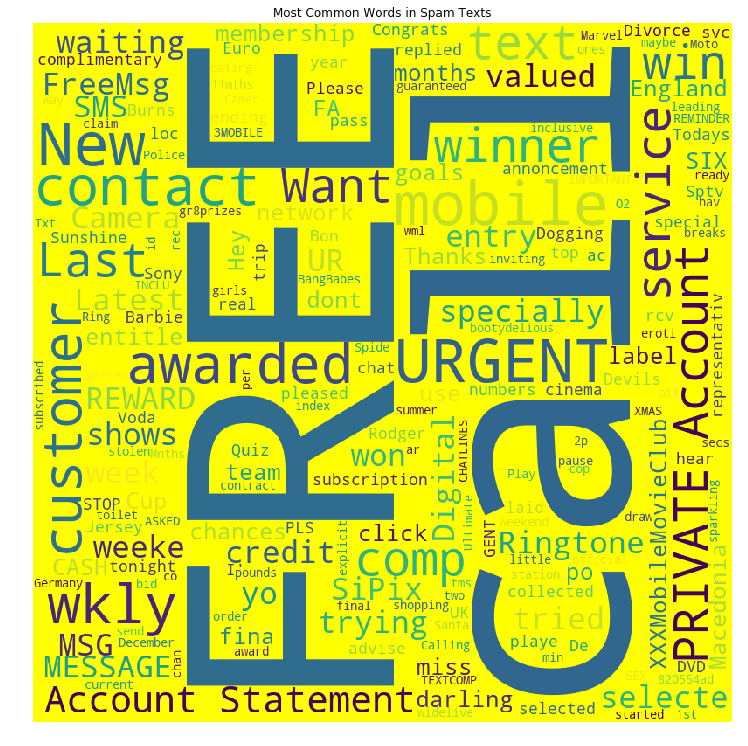

In [925]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title("Most Common Words in Spam Texts")
plt.show()

In [215]:
notspam_wordcloud = WordCloud(width = 800, height = 800, 
                               background_color = "red", min_font_size = 10).generate(str(data_set[data_set["label"]==0]))

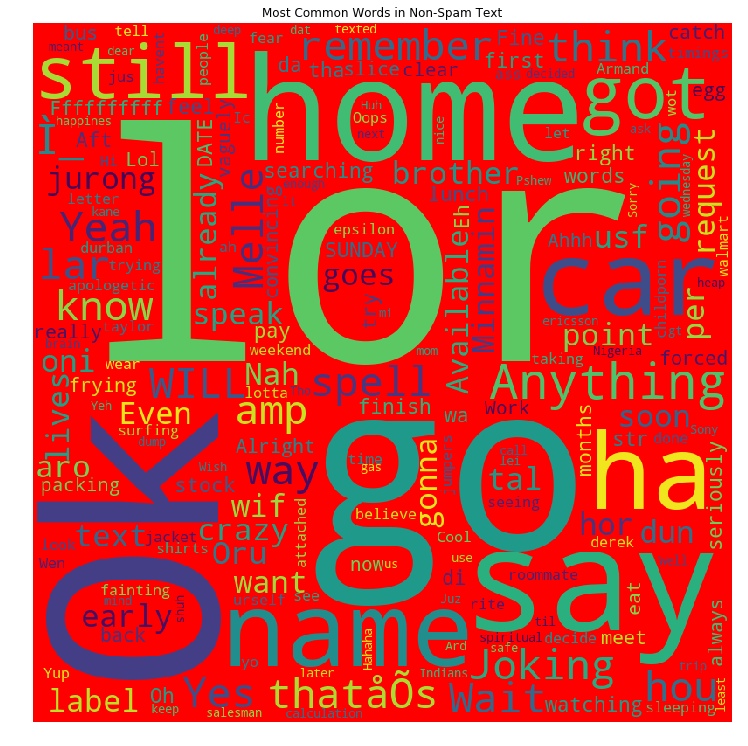

In [926]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(notspam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title("Most Common Words in Non-Spam Text")
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Processing Text (lowercase, stopwords, tokenize, etc..)<br></p>

In [259]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/kushaal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kushaal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [927]:
def prepare_text(text):
    assert(type(text) == str)
    new_text = text
    new_text = re.sub(r'[^\w\d\s]', ' ', new_text)#remove punctuation
    new_text = re.sub(r'^\s+|\s+?$', ' ', new_text)#remove addiitonal spacing 
    new_text = re.sub(r'^\s+|\s+?$', '', new_text.lower())#lowercase
    
    #tokenize
    stop_words = nltk.corpus.stopwords.words("english")
    tokens = word_tokenize(new_text)
    
    #remove stopwords
    filtered_word_list = tokens[:] #make a copy of the word_list
    for word in tokens: # iterate over word_list
      if word in stop_words: 
        filtered_word_list.remove(word)
    
    #Stemming the words
    stemmer = PorterStemmer()
    new_text = [stemmer.stem(word) for word in filtered_word_list]
    return ' '.join(new_text)

In [546]:

def get_features(text):
    text  = text.split()
    return{word: True for word in text}

In [809]:

def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stoplist])


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Splitting data into train and test sets<br></p>

In [909]:
spam_set = data_random[data_random["label"]==1]
#spam_set.head()
spam.shape[0]



747

In [911]:
spam_set = spam_set.reset_index(drop=True)
spam_set.head()

,label,text
0,1,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
1,1,For ur chance to win a å£250 wkly shopping spr...
2,1,Customer service announcement. We recently tri...
3,1,"Loan for any purpose å£500 - å£75,000. Homeown..."
4,1,URGENT!! Your 4* Costa Del Sol Holiday or å£50...


In [871]:
temp_spam_text = ""
spam_text_list = list()
for i in range(747):
    print(prepare_text(spam_set["text"][i]))
    temp_spam_text = prepare_text(spam_set["text"][i])
    spam_text_list.append(temp_spam_text)

print(spam_text_list)


hi custom loyalti offer new nokia6650 mobil å 10 txtauction txt word start 81151 get 4t ctxt tc 150p mtmsg
ur chanc win å 250 wkli shop spree txt shop 80878 c www txt 2 shop com custcar 08715705022 1x150p wk
custom servic announc recent tri make deliveri unabl pleas call 07099833605 schedul ref 9280114
loan purpos å 500 å 75 000 homeown tenant welcom previous refus still help call free 0800 1956669 text back help
urgent 4 costa del sol holiday å 5000 await collect call 09050090044 toclaim sae tc pobox334 stockport sk38xh costå 1 50 pm max10min
pleas call 08712402972 immedi urgent messag wait
call germani 1 penc per minut call fix line via access number 0844 861 85 85 prepay direct access www telediscount co uk
urgent pleas call 09061213237 landlin å 5000 cash 4 holiday await collect cs sae po box 177 m227xi 16
save money wed lingeri www bridal petticoatdream co uk choos superb select nation deliveri brought weddingfriend
http tm widel com index wml id 820554ad0a1705572711 first trueåác

1000 flirt txt girl bloke ur name age eg girl zoe 18 8007 join get chat
want new video handset 750 time network min unlimit text camcord repli call 08000930705 del sat
want 2 get laid tonight want real dog locat sent direct 2 ur mob join uk largest dog network txting moan 69888nyt ec2a 31p msg 150p
repli name address receiv post week complet free accommod variou global locat www phb1 com ph 08700435505150p
spook mob halloween collect logo pic messag plu free eeri tone txt card spook 8007 zed 08701417012150p per logo pic
well done 4 costa del sol holiday å 5000 await collect call 09050090044 toclaim sae tc pobox334 stockport sk38xh costå 1 50 pm max10min
someon contact date servic enter phone becausethey fanci find call landlin 09058098002 pobox1 w14rg 150p
call 09094100151 use ur min call cast 10p min mob vari servic provid aom gbp5 month aom box61 m60 1er u stop age 18
dear 0776xxxxxxx u invit xchat final attempt contact u txt chat 86688 150p msgrcvdhg suite342 2land row w1j6hl ldn 18

sm ac blind date 4u rodds1 21 aberdeen unit kingdom check http img sm ac w icmb3cktz8r7 4 blind date send hide
welcom uk mobil date msg free give free call 08719839835 futur mg bill 150p daili cancel send go stop 89123
life never much fun great came made truli special forget enjoy one gbp sm
want explicit sex 30 sec ring 02073162414 cost 20p min gsex pobox 2667 wc1n 3xx
ur cash balanc current 500 pound maxim ur cash send collect 83600 150p msg cc 08718720201 po box 114 14 tcr w1
six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info
freemsg fanci flirt repli date join uk fastest grow mobil date servic msg rcvd 25p optout txt stop 83021 repli date
4 costa del sol holiday å 5000 await collect call 09050090044 toclaim sae tc pobox334 stockport sk38xh costå 1 50 pm max10min
orang custom may claim free camera phone upgrad loyalti call 0207 153 9996 offer end 14thmarch c appli opt availa
import custom servic announc premier call freephon 0

heard u4 call night knicker make beg like u last time 01223585236 xx luv nikiyu4 net
think ur smart win å 200 week weekli quiz text play 85222 cs winnersclub po box 84 m26 3uz 16 gbp1 50 week
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send å 1 50 rcv
import custom servic announc call freephon 0800 542 0825
complimentari 4 star ibiza holiday å 10 000 cash need urgent collect 09066364349 landlin lose box434sk38wp150ppm18
urgent import inform 02 user today lucki day 2 find log onto http www urawinn com fantast surpris await
free msg sorri servic order 81303 could deliv suffici credit pleas top receiv servic
urgent 2nd attempt contact u å 900 prize yesterday still await collect claim call 09061702893
u secret admir look 2 make contact u find r reveal think ur special call 09058094599
winner valu network custom hvae select receiv å 900 reward collect call 09061701444 valid 24 hour acl03530150pm
realiz 40 year thousand old ladi run around tattoo
peopl dog area call 09

u secret admir look 2 make contact u find r reveal think ur special call 09058094565
get 3 lion england tone repli lionm 4 mono lionp 4 poli 4 go 2 www rington co uk origin n best tone 3gbp network oper rate appli
privat 2004 account statement 078498 7 show 786 unredeem bonu point claim call 08719180219 identifi code 45239 expir 06 05 05
good luck draw take place 28th feb 06 good luck remov send stop 87239 custom servic 08708034412
free 1st week entri 2 textpod 4 chanc 2 win 40gb ipod å 250 cash everi wk txt vpod 81303 ts cs www textpod net custcar 08712405020
mobil 11mth updat free orang latest colour camera mobil unlimit weekend call call mobil upd8 freefon 08000839402 2stoptxt
rock yr chik get 100 filthi film xxx pic yr phone rpli filth 69669 saristar ltd e14 9yt 08701752560 450p per 5 day stop2 cancel
come take littl time child afraid dark becom teenag want stay night
privat 2003 account statement 078
xma offer latest motorola sonyericsson nokia free bluetooth dvd doubl min 1000 tx

hi ya babe x u 4goten bout scammer get smart though regular vodafon respond get prem rate msg subscript no use also bewar
spook mob halloween collect logo pic messag plu free eeri tone txt card spook 8007 zed 08701417012150p per logo pic
win å 1000 cash prize prize worth å 5000
ur go 2 bahama callfreefon 08081560665 speak live oper claim either bahama cruis ofå 2000 cash 18 opt txt x 07786200117
freemsg today day readi horni live town love sex fun game netcollex ltd 08700621170150p per msg repli stop end
free msg singl find partner area 1000 real peopl wait chat send chat 62220cncl send stopc 08717890890å 1 50 per msg
b4u voucher w c 27 03 marsm log onto www b4utel com discount credit opt repli stop custom care call 08717168528
hey boy want hot xxx pic sent direct 2 ur phone txt porn 69855 24hr free 50p per day stop text stopbcm sf wc1n3xx
chanc realiti fantasi show call 08707509020 20p per min ntt ltd po box 1327 croydon cr9 5wb 0870 nation rate call
win year suppli cd 4 store ur choi

In [872]:
len(spam_text_list)

747

In [874]:
spam_train = spam_text_list[:int(len(spam_text_list) * 0.8)]

In [877]:
spam_test = spam_text_list[int(len(spam_text_list) * 0.8): ]

In [878]:
spam_train_feats = [(word_feats(f), 'spam') for f in spam_train ]

In [879]:
spam_test_feats = [(word_feats(f), 'spam') for f in spam_test ]

In [889]:
nonspam_set = data_random[data_random["label"]==0]
#spam_set.head()
nonspam_set.shape[0]
nonspam_set = nonspam_set.reset_index(drop=True)

#data_random["text"][2]
#spam_set["text"][4]

In [907]:
temp_nonspam_text = ""
nonspam_text_list = list()
for i in range(nonspam_set.shape[0]):
    print(prepare_text(nonspam_set["text"][i]))
    temp_nonspam_text = prepare_text(nonspam_set["text"][i])
    nonspam_text_list.append(temp_nonspam_text)

print(nonspam_text_list)


pleas protect e threat sib never ask sensit inform like password atm sm pin thru email never share password anybodi
rat hey u ever vote next theme
home
yahoo boy bring perf legal
hiya good day spoken sinc weekend
haf enuff space got like 4 mb
ur paper today e morn aft
da vijay go talk jaya tv
get free call
nationwid auto centr someth like newport road like
want say holi shit guy kid bud
life mean lot love life love peopl life world call friend call world ge
dunno wat get 4
im good think
height oh shit situat guy throw luv letter gal fall brother head who gay
great trip india bring light everyon project everyon lucki see smile bye abiola
hello wat talk email address
ok vl u know got adsens approv
oh shit thought trip loooooool make much sens grin sofa refer sleep couch link sent went trip oh babe go celebr rent
mm food da
watch cartoon listen music amp eve go templ amp church u
cool time think get
late k wish
yup
sure thing big man hockey elect 6 û go longer hour though
cant pick phone 

ok let noe later n ask call u tmr
fine difficulti phone work mine pl send anoth friend request
make babi yo tho
yo gon na still stock tomorrow today tri get dubsack
dare stupid wont tell anyth hear wont talk
plm come da way
sent ur email id soon
movi laptop
one small prestig problem
get librari
yo chad gymnast class wan na take site say christian class full
oh got mani respons
time come later
problem talk later
tell tell one treat hi hi hi
sit ard noth lor u leh busi w work
sorri help
might go 2 sch yar e salon v bore
ummmmmaah mani mani happi return day dear sweet heart happi birthday dear
heard week
ok
guess worri must know way bodi repair quit sure worri take slow first test guid ovul relax noth said reason worri keep followin
good friend care close friend understand true friend stay forev beyond word beyond time gud ni8
finish lunch alreadi u wake alreadi
custom place call
cool text readi
come tomorrow di
k special
k addi amp art get home
oh fuck sake like tallahasse
thk 50 shd ok 

start search get job day great potenti talent
yep like pink furnitur tho
featheri bowa someth guy know
accident brought em home box
u come funer home
u come n search tat vid finishd
need detail onlin job
hey sathya till dint meet even singl time saw situat sathya
way rencontr meet mountain dont
leav
wont get concentr dear know mind everyth
ìï still got lesson ìï sch
best msg hard person u know one step foward make u fall love amp one step back ruin ur friendship good night
said u mind go bedroom minut ok sed sexi mood came 5 minut latr wid cake n wife
wan na art
current food alon also
want lt gt rs da
ok lor buy wat
gone get info bt dont know
pick variou point
sad stori man last week b day wife nt wish parent forgot n kid went work even colleagu wish
sorri call later meet sir
went ganesh dress shop
eh den sat u book e kb liao huh
wake lt gt morn
dhoni luck win big titl win
forgot 2 ask ì_ smth card da present lei ìï want 2 write smth sign
eh ur laptop got stock lei say mon muz come tak

yet ya sapna aunti maneg day hogidh chinnu full weak swalpa black agidhan
look ami ure beauti intellig woman like u lot know u donåõt like like donåõt worri
lil fever fine
got back dislik bed
wait 4 u lor need 2 feel bad lar
cool text head
hope great day
hey chief give bell get need talk royal visit 1st june
anyth lar
ok lor anyway thk cant get ticket co like quit late alreadi u wan 2 go look 4 ur fren darren wif
work pleas call
send yetti number pl
read text sent meant joke read light
senthil group compani apnt 5pm
day ì_ say ì_ cut ur hair paragon call hair sens ì_ noe much hair cut
plan famili set stone
r ì_ go 4 today meet
depend individu lor e hair dresser say pretti parent say look gong u kaypoh also dunno wat collect
dont know exactli could ask chechi
ah well confus thing doesnt thought friend mayb wrong thing alreadi sort invit tho may come co money
long quit get like 5 minut day
lt gt ish minut 5 minut ago wtf
pete phone still jenni colleg leann
oop sorri check mind pick tomo 

eat shit wait ur monkey face bitch u asshol
ìï bot note oredi co juz rem got
sent like
evo download flash jealou
tmr ì_ brin lar aiya later come n c lar mayb ì_ neva set properli ì_ got da help sheet wif ì_
ok sweet dream
sorri hurt
head straight
yeah tote u wan na
cant pick phone right pl send messag
babe lost
haha friend tyler liter ask could get dubsack
send email mind lt gt time per night
come right ahmad
yet chikku go room nw bu
back bit long co accid a30 divert via wadebridg brilliant weekend thank speak soon lot love
guy
draw va dont think
meant say cant wait see u get bore bridgwat banter
dont let studi stress l8r
okay lor wah like def wont let us go haha say term condit
sorri call later
carlo say mu lt gt minut
back brum thank put us keep us happi see soon
brainless babi doll vehicl sariyag drive madok barolla
yeah get random dude need chang info sheet parti lt gt 7 never studi safe
hi babi im sat bloodi bu mo wont home 7 30 wan na somethin later call later ortxt back jess xx


geniu brother pl send number skype
make 3 4 fuck sake x
honeybe said sweetest world god laugh amp said wait u havnt met person read msg moral even god crack joke gm gn ge gn
noth much chillin home super bowl plan
ill 3 min look
sure check happen around area
haha awesom might need take doin tonight
well watch shrek 3d b
dear reliev westonzoyland go plan end
beauti sleep help ur pimpl
puriti friendship two smile read forward messag smile see name gud evng
nice wait text right gon na pay ticket ya know
u earli
promis take good care princess run pleas send pic get chanc ttyl
scream mean shout
book lesson msg call work sth go get spec membership px3748
sian aft meet supervisor got work 2 liao u work
wish
oh phone phone disconnect
fuck chicken messag would late woould buzz hear word
k must book huh go yoga basic sunday
lover need
whole car appreci last two dad map read semi argument apart thing go ok p
watch surya movi 6 pm vijay movi pokkiri
oh oh den muz chang plan liao go back yan jiu
u c

tell said eat shit
sorri call later
ok lor u wan go look 4 u
one teach ship car
yep fine 7 30 8 30 ice age
gon na go get taco
da stupid da alway send like believ messag pandi mental
friend want drive em someplac probabl take
mummi boy good bad posit neg mummi made wait hmmmm
hi darlin im missin u hope good time u back time u give call home jess xx
tot u outsid co darren say u come shop cours nice wat ju went sim lim look mp3 player
honey boo miss u
gim lt gt minut ago
u attend ur drive lesson mani time wk n day
ya ok vikki vl c witin lt gt min il repli u
fishrman woke earli mrng dark wait amp found sack ful stone strtd throwin thm in2 sea 2 pass time atlast ju 1stone sun rose amp found tht r nt stone diamond moral dont wake earli mrng good night
thought slide enough
noth meant money enter account bank remov flat rate someon transfer lt gt account lt gt dollar got remov bank differ charg also differ sure trust 9ja person send account detail co
alreadi back home probabl
take major role c

yar els thk sort funni thing
mode men left
minor shindig place later tonight interest
huh cant thk oredi mani page
peopl see msg think iam addict msging wrong bcoz know iam addict sweet friend bslvyl
stand away heart ach without wonder crave
detroit home snow enjoy
know wot peopl wear shirt jumper hat belt know r cribb
u
put readi lt time gt
hi kindli give us back document submit loan stapati
like person size
fyi usf swing room whenev
lot sick thing go round take easi hope u feel better soon lol
get opinion someth first
hey pay salari de lt gt
ok set let u noe e detail later
ok gon na head usf like fifteen minut
glad went well come 11 plenti time clair goe work
gr8 handl victoria island traffic plu album due
hi email address chang
ps u ur grown right
dear sir salam alaikkum pride pleasur meet today tea shop pleas send contact number qatar rakhesh indian pl save number respect regard
meet lunch la
yay final lol miss cinema trip last week
fran decid 2 go n e way im complet broke knacker 

sir late pay rent past month pay lt gt charg felt would inconsider nag someth give great cost didnt speak howev recess wont abl pay charg month henc askin well ahead month end pleas help thank
know rape dude poker
ok leav need ask
nice day dear
ìï still attend da talk
po de need job aha
hm good morn headach anyon
7 wonder world 7th 6th ur style 5th ur smile 4th ur person 3rd ur natur 2nd ur sm 1st ur love friendship good morn dear
mm time dont like fun
oh babi hous come dont new pictur facebook
love
stupid possibl
great never better day give even reason thank god
night end anoth day morn come special way may smile like sunni ray leav worri blue blue bay
lol boo hope laugh
alway yahoo messeng send messag get may send mobil mode sha get repli
great run ttyl
drama pl enough famili struggl hot sun strang place reason ego go invit actual necess go wait seriou reppurcuss
da al r lt gt
babe goe day miss alreadi love love kiss hope everyth goe well
want sent lt gt mesag today that sorri hurt
s

ok bu come soon come otherwis tomorrow
go open room til thanksgiv without upcharg
big brother û realli scrape barrel shower social misfit
yeah bare enough room two us x mani fuck shoe sorri man see later
hi test lt gt rd
well weather cali great complex great need car move freeli tax outrag great place sad part miss home
never blame day ur life good day give u happi bad day give u experi essenti life god bless good morn
today accept day u accept brother sister lover dear1 best1 clos1 lvblefrnd jstfrnd cutefrnd lifpartnr belovd swtheart bstfrnd rpli mean enemi
hair cream ship
hey what u sleep morn
ok come ur home half hour
good afternoon boytoy goe walk day get polic abstract still wake miss babe
aiyo co sm ì_ ì_ neva repli wait 4 ì_ repli lar tot ì_ havent finish ur lab wat
jay say put lt gt
photoshop make comput shut
text drop x
much buzi
lol grr mom take forev prescript pharmaci like 2 minut away ugh
neft transact refer number lt gt rs lt decim gt credit beneficiari account lt gt lt t

macha dont feel upset assum mindset believ one even wonder plan us let life begin call anytim
hey dont go watch x men lunch haha
sorri call later lt gt min
go fool dont cheat other ok
unlimit text limit minut
hi move in2 pub would great 2 c u u cud come
tough
cold dont sad dear
aight well keep inform
û_ r stayin extra week back next wed rugbi weekend hi c u soon ham
oop thk dun haf enuff go check tell ì_
schedul next week town weekend
k k train process
sorri call later
mayb woke fuck 3 problem
sch neva mind u eat 1st lor
hey still want go yogasana coz end cine go bath hav steam bath
call later network urgnt sm
say good sign well know track record read women
mine like fr china noisi
happi valentin day know earli hundr handsom beauti wish thought finish aunti uncl 1st
tonight mate catch sleep new number way
hi dear call urgnt know what problem want work problem least tell wate repli
u find time bu coz need sort stuff
realli master
confirm eat esplanad
howz pain come today said ystrday ic

7 wonder world 7th 6th ur style 5th ur smile 4th ur person 3rd ur natur 2nd ur sm 1st ur love friendship good morn dear
lol ok snatch purs
ìï thk wat eat tonight
wud never mind u dont miss u dont need u wil realli hurt wen u need amp u dont tell take care
ya srsli better yi tho
messag food
hurt teas make cri end life die plz keep one rose grave say stupid miss u nice day bslvyl
fine anytim best
depend qualiti want type sent boy fade glori 6 want ralph mayb 2
nah straight bring bud drink someth actual littl use straight cash
wot student discount u get book
think still car
told hr want post chennai work
sac score big hundr set batsman
u goin 2nite
call plz number show coveragd area urgnt call vasai amp reach 4 clock call plz
right think
ah see lingo let know wot earth finish make
also sorta blown coupl time recent id rather text blue look weed
ye princess want pleas everi night wish command
hello boytoy geeee miss alreadi woke wish bed cuddl love
hey tmr meet bugi 930
hi im relax time ev

5 night nt stay port step liao ex
k see k
hi babe im home wan na someth xx
get gift year didnt get anyth bad
pleas ask mummi call father
oh ask fun haha take care ì_
darl sister school resum minimum wait period reappli take care
huh mean comput scienc like dat one push n
mmmmm sooooo good wake word morn love mmmm fuck love lion devour kiss across sea
e best 4 ur exam later
yeah wors
know lt gt around 5
ju came back fr lunch wif si u leh
2mro come gym machan goodnight
world run still mayb feel admit mad correct let call life keep run world may u r also run let run
hey gorgeou man work mobil number good one babe squishi mwah
tomorrow go theatr come wherev u call tell come tomorrow
yup msg tat yiju tot group mate co meet today mah askin ì_ leav earlier wat mah co mayb ì_ haf walk v far
lol forgot eh ye bring babe
got tea sure flavour
hi babi im cruisin girl friend r u 2 give call hour home that alright fone fone love jenni xxx
dunno co v late n reach insid alreadi ate spageddi lor e gal r

kay sinc alreadi
thank pick trash
sorri guess whenev get hold connect mayb hour two text
wat time u finish ur lect today
though shd go n fun bar town someth ûò sound ok
cme want go ho 2morow wil cme got dear didnt say time
da happi sit togeth na
come din c ì_ yup cut hair
ye fine
love u 2 littl poci bell sorri love u
ok theori test ì_ go book think 21 may coz thought wan na go jiayin isnt free
ok da alreadi plan wil pick
hi chikku send nice msg
actual send remind today wonder weekend
hope enjoy game yesterday sorri touch pl know fondli bein thot great week abiola
take exam march 3
ok
tyler get 8th leav long 9 get like hour
well imma definit need restock thanksgiv let know
anyth lor
love one law make happi person love way friendship one law never make ur friend feel alon aliv gud night
u want come back beauti necklac token heart that give wife like see one give dont call wait till come
drive read need write
oop lt gt
ta job avail let know pleas co realli need start work
aight sorri take

got messag ignor ye shop
yar want 2 scold u yest late alreadi got zhong se qing u ask b4 ask go w u lor n u still act real
app class varaya elaya
mani peopl seem special first sight remain special till last sight maintain till life end sh ja
go n buy juz buy get lar
id check like 1 bowl worth left
sorri call later
hi darlin im helen fone im gon na b princ 2 nite pleas come tb love kate
miss call miss call khelat kintu opponent miss call dhort lage that rule one great phone receiv qualiti win
work eye philosophi text u later bit free chat
done internet connect v slow û send tri later first thing tomo
got call landlin number ask come anna nagar go afternoon
reach ten morn
fine got enough bud last night least
sorri free
lol great im get hungri
pl help tell ashley cant find number oh
littl difficult simpl way enter place
kent vale lor ìï wait 4 ar
revers cheat mathemat
ju finish avatar nigro
happi new year u
bit ur smile hppnss drop ur tear sorrow part ur heart life heart like mine wil car

part check iq
k sent
text creepi like think forgot
still grand prix
sorri troubl u buy 4d dad 1405 1680 1843 2 big 1 small sat n sun thanx
good night dear sleepwel amp take care
k k cant come search job
cant see join deni mina deni want alon time
sorri earlier put fire around talk 9 actual life lol
oh ok didnt know meant yep babi jontin
eek lot time especi sinc american pie like 8 minut long stop sing
happi new year princess
talk atleast day otherwis miss best friend world shakespear shesil lt gt
enter cabin pa said happi b day boss felt special askd 4 lunch lunch invit apart went
ì 140 ard ìä rest ard 180 least ì price 4 ì 2 bedrm 900
make easi pay back lt gt yr say pay back earlier get
baaaaaaaab wake miss crave need
v aluabl ffection l oveabl e ternal n obl ruth ntimat n atur e namou happi valentin day advanc
still look car buy gone 4the drive test yet
opposit side drop
man bu slow think gon na get
sorri call later meet
ok sure time tho sure get librari class tri see point good eve


tell need investig anywher
still around could use half 8th
ok prob come lunch
thank u
ye glad made
stomach thru much trauma swear eat better lose weight
way
oh god taken teeth pain
come back tampa ffffuuuuuuu
practis curtsey
make sure alex know birthday fifteen minut far concern
let math good
india win level seri mean record
intrepid duo great time see soon
hey loverboy love tell look pictur ach feel leg fuck want need crave
pl help tell sura expect batteri hont pl send messag download movi thank
thanx yup come back sun finish dinner go back 2 hotel time fli tog 4 exactli mth today hope haf mani mth come
u wake alreadi wat u u pick us later rite take sq825 reach ard 7 smth 8 like dat u check e arriv time c ya soon
free call
ye said
take like noon
u call
piggi r u awak bet u still sleep go 4 lunch
ye amma life take lot turn sit tri hold steer
well done blimey exercis yeah kinda rememb wot hmm
much pay suganya
amaz rearrang letter give mean dormitori dirti room astronom moon starer eye s

want custom offic discount oh
im sorri bout last nite wasnåõt ur fault spous pmt sumthin u 4give think u shldxxxx
birthday feb lt gt da
get gandhipuram walk cross cut road right side lt gt street road turn first right
know peopl hit fuck ye
boy made fun today ok problem sent one messag fun
thinkin someon good drug
bother trust answer pl
haf u eaten wat time u wan 2 come
run manag 5 minut need oxygen might resort roller option
ye offic da
mum sent mani mani messag sinc got want know actual get enjoy rest day
hope alright babe worri might felt bit despar learn job fake wait come back love
went project centr
womdarful actor
3 pa select
train back northampton afraid
wont touch permiss
ok ill tell compani
told tell stupid hear wont tell anyth dad call brother spoken
said gon na snow start around 8 9 pm tonit predict inch accumul
wyli tampa sarasota
huh earli ì_ dinner outsid izzit
pick ur fone u dumb
possess especi first offens
home pleas call
hey someth came last min think wun sign tmr hee

hamster dead hey tmr meet 1pm orchard mrt
oki
job profil seem like bpo
good need drug
still look job much ta earn
hi babe thank come even though didnt go well want bed hope see soon love kiss xxx
thanx birthday alreadi
thank u better work caus feel use otherwis
first time dhoni rock
gud mrng dear nice day
messag text miss sender name miss number miss sent date miss miss u lot that everyth miss sent via fullonsm com
eldest know
god ask forgiv littl child gave love repli
mmm that better got roast iåõd b better drink 2 good indian
ok call mom instead fun
pathaya enketa maraikara pa
ugh fuck resub eve
donno scorabl
k wat tht incid
lmao ok wont need u hair anymor
could seen recognis face
cha quiteamuz thatåõscool babe
bishan lei tot ì_ say lavend
tot group mate lucki havent repli wat time ì_ need leav
doesnt need test
cant pick phone right pl send messag
langport sorri probabl bed 9pm suck ill xma go2sri lanka
yup thk r e teacher said make face look longer darren ask 2 cut short
hai ana tom

In [891]:
len(nonspam_text_list)

4825

In [892]:
nonspam_train = nonspam_text_list[:int(len(nonspam_text_list) * 0.8)]

In [893]:
nonspam_test = nonspam_text_list[int(len(nonspam_text_list) * 0.8): ]

In [894]:
nonspam_train_feats = [(word_feats(f), 'not spam') for f in nonspam_train ]

In [902]:
nonspam_test_feats = [(word_feats(f), 'not spam') for f in nonspam_test ]

In [897]:
train_set_feats = nonspam_train_feats + spam_train_feats

In [898]:
test_set_feats = nonspam_test_feats + spam_test_feats

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Training<br></p>

In [899]:
classifier = NaiveBayesClassifier.train(train_set_feats)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Classifying<br></p>

In [903]:
print ('Accuracy on the training set = ' + str(classify.accuracy(classifier, train_set_feats)))

Accuracy on the training set = 0.9167601525689926


In [904]:
print ('Accuracy of the test set = ' + str(classify.accuracy(classifier, test_set_feats)))

Accuracy of the test set = 0.1336322869955157


In [929]:
 classifier.show_most_informative_features(20)

Most Informative Features
                       å = True             spam : not sp =    280.5 : 1.0
                      uk = True             spam : not sp =    256.1 : 1.0
                   award = True             spam : not sp =    204.5 : 1.0
                     www = True             spam : not sp =    192.4 : 1.0
                      16 = True             spam : not sp =    182.9 : 1.0
                    1000 = True             spam : not sp =    170.0 : 1.0
                     100 = True             spam : not sp =    139.9 : 1.0
                 voucher = True             spam : not sp =    122.7 : 1.0
                   nokia = True             spam : not sp =    114.9 : 1.0
                    code = True             spam : not sp =    105.5 : 1.0
                  urgent = True             spam : not sp =     98.7 : 1.0
                   await = True             spam : not sp =     92.5 : 1.0
                deliveri = True             spam : not sp =     79.6 : 1.0

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Analysis<br></p>

The accuracy on the test set is only 13%. This is because the ratio of spam : not spam texts in this data set is quite low. There are over 4,000 non spam emails while there are only 747 spam emails. More training data for the spam_set is needed in order to improve the classification accuracy

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Sources<br></p>

https://cambridgespark.com/content/tutorials/implementing-your-own-spam-filter/index.html

https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73

https://hackernoon.com/how-to-build-a-simple-spam-detecting-machine-learning-classifier-4471fe6b816e